# Импорт всех необходимых библиотек

---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score, precision_recall_curve, auc, precision_score, recall_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, BatchNormalization, Input
from keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.regularizers import l2
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")


# 📊 EDA и ресерч-анализ


---



In [ ]:
df = pd.read_csv('Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Расшифруем атрибуты табилцы
---
1. PassengerId - Уникальный идентификатор пассажира (от 1 до 891)
2. Survived - Целевая переменная (0 = не выжил, 1 = выжил)
3. Pclass - Класс билета (1 = Первый класс, 2 = Второй, 3 = Третий)
4. Name - Полное имя пассажира (включая обращение: Mr, Mrs, Miss и т.д.)
5. Sex - Пол (male/female)
6. Age - Возраст в годах (дробные значения для младенцев младше 1 года)
7. SibSp - Количество братьев/сестер или супругов на борту
8. Parch - Количество родителей/детей на борту
9. Ticket - Номер билета
10. Fare - Стоимость билета
11. Cabin - Номер каюты (много пропущенных значений)
12. Embarked - Порт посадки (C = Cherbourg, Q = Queenstown, S = Southampton)

In [ ]:
#Оценка пропусков df
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Анализ количества выживших
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


## Начнём составлять гипотезы и проверять их, выводя графики и диаграммы


---



### Гипотеза №1. Пол
Из исторических данных следует, что у женщин и детей был приоритет при посадке в шлюпки. Проверим это:

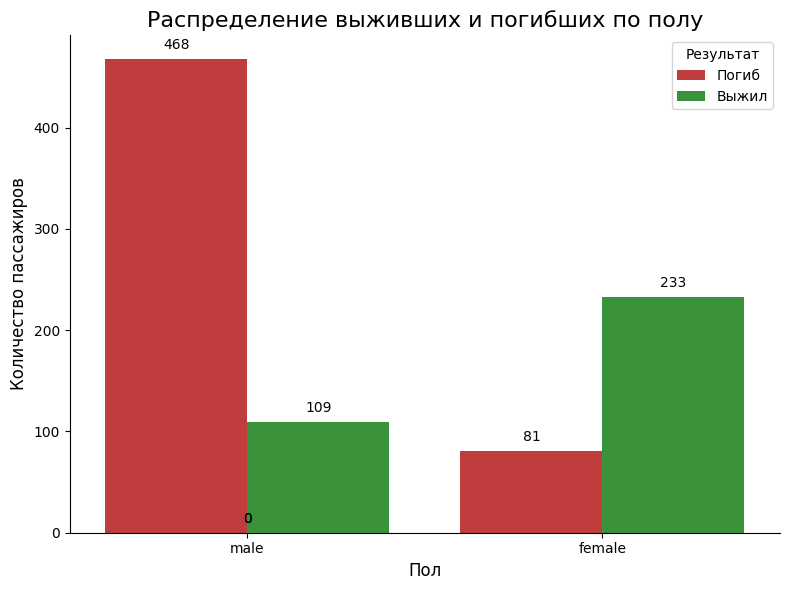

Процент выживших пассажиров Титаника по полу:
Мужчины: 18.9%
Женщины: 74.2%


In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=df,
              palette={0: '#d62728', 1: '#2ca02c'})

plt.title('Распределение выживших и погибших по полу', fontsize=16)
plt.xlabel('Пол', fontsize=12)
plt.ylabel('Количество пассажиров', fontsize=12)
plt.legend(['Погиб', 'Выжил'], title='Результат')

# Добавляем подписи с абсолютными значениями
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2., height + 10,
                   f'{int(height)}', ha='center')

sns.despine()
plt.tight_layout()
plt.show()

# Рассчитываем проценты выживших по полу
survival_rate = df.groupby('Sex')['Survived'].mean() * 100

# Выводим результаты
print("Процент выживших пассажиров Титаника по полу:")
print(f"Мужчины: {survival_rate['male']:.1f}%")
print(f"Женщины: {survival_rate['female']:.1f}%")

Гипотеза оправдалась, женщины имели куда бОльший шанс на выживание

### Гипотеза №2. Возраст
Теперь стоит проверить выживаемость, в зависимости от возраста пассажира. Данный пункт будет составным, т.к. смею предположить, что в первую очереди помогали спастись пенсионерам и детям. Проверим это по отдельности.

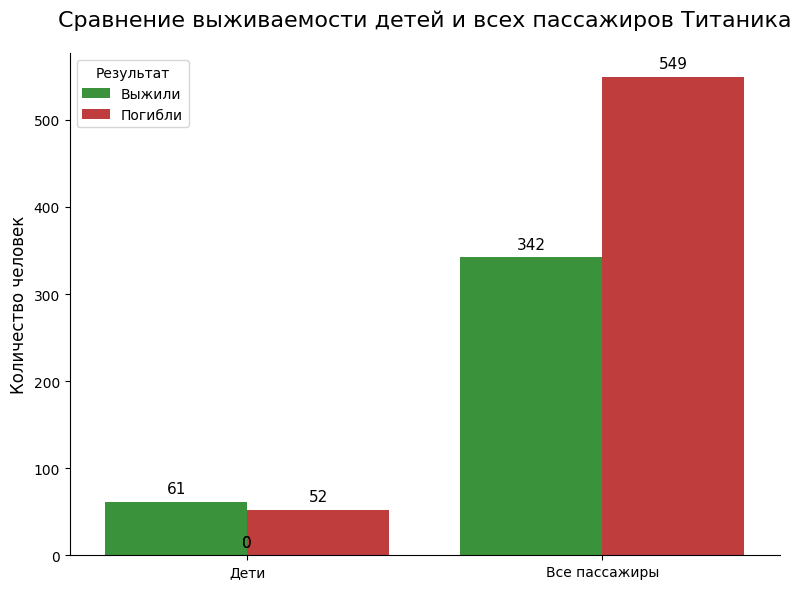

Процент выживших пассажиров:
Дети: 54.0%
Все: 38.4%


In [ ]:
# Определяем детей (возраст < 18 лет)
children = df[df['Age'] < 18]

# Создаем данные для сравнения
comparison_data = pd.DataFrame({
    'Группа': ['Дети', 'Все пассажиры', 'Дети', 'Все пассажиры'],
    'Результат': ['Выжили', 'Выжили', 'Погибли', 'Погибли'],
    'Количество': [
        children['Survived'].sum(),
        df['Survived'].sum(),
        (children['Survived'] == 0).sum(),
        (df['Survived'] == 0).sum()
    ]
})

# Создаем график
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Группа', y='Количество', hue='Результат',
                 data=comparison_data,
                 palette={'Выжили': '#2ca02c', 'Погибли': '#d62728'})

# Настройки графика
plt.title('Сравнение выживаемости детей и всех пассажиров Титаника', fontsize=16, pad=20)
plt.xlabel('')
plt.ylabel('Количество человек', fontsize=12)

# Добавляем подписи с абсолютными значениями
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 10,
           f'{int(height)}', ha='center', fontsize=11)

sns.despine()
plt.tight_layout()
plt.show()

# Добавляем проценты выживаемости
child_survived_pct = children['Survived'].mean() * 100
total_survived_pct = df['Survived'].mean() * 100

# Выводим результаты
print("Процент выживших пассажиров:")
print(f"Дети: {child_survived_pct:.1f}%")
print(f"Все: {total_survived_pct:.1f}%")

Гипотеза оправдалась, дети имели более высокую вероятность на выживание

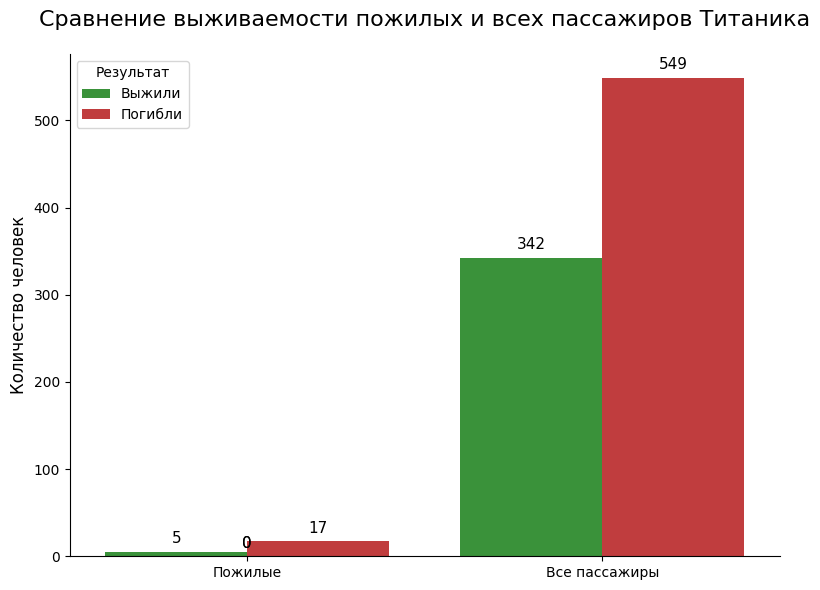

Процент выживших пассажиров:
Пожилые: 22.7%
Все: 38.4%


In [ ]:
# Определяем пожилых (возраст > 60 лет)
Senior = df[df['Age'] > 60]

# Создаем данные для сравнения
comparison_data = pd.DataFrame({
    'Группа': ['Пожилые', 'Все пассажиры', 'Пожилые', 'Все пассажиры'],
    'Результат': ['Выжили', 'Выжили', 'Погибли', 'Погибли'],
    'Количество': [
        Senior['Survived'].sum(),
        df['Survived'].sum(),
        (Senior['Survived'] == 0).sum(),
        (df['Survived'] == 0).sum()
    ]
})

# Создаем график
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Группа', y='Количество', hue='Результат',
                 data=comparison_data,
                 palette={'Выжили': '#2ca02c', 'Погибли': '#d62728'})

# Настройки графика
plt.title('Сравнение выживаемости пожилых и всех пассажиров Титаника', fontsize=16, pad=20)
plt.xlabel('')
plt.ylabel('Количество человек', fontsize=12)

# Добавляем подписи с абсолютными значениями
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 10,
           f'{int(height)}', ha='center', fontsize=11)

sns.despine()
plt.tight_layout()
plt.show()

# Добавляем проценты выживаемости
Senior_survived_pct = Senior['Survived'].mean() * 100
total_survived_pct = df['Survived'].mean() * 100

# Выводим результаты
print("Процент выживших пассажиров:")
print(f"Пожилые: {Senior_survived_pct:.1f}%")
print(f"Все: {total_survived_pct:.1f}%")

Данная гипотеза не оправдалась. Процент выживших пассажиров с возрастом более 60 лет оказался куда ниже.

### Гипотеза №3. Класс билета
Почитав немножко про историю крушения Титаника, я смог выяснить, что каюты первого класса находились на верхней палубе, где как раз и находились спасательные шлюпки. В то же время каюты третьего класса находились на нижних палубах и в концах корабля. Можно смело предположить, что шансы на спасение у пассажиров первого класса были выше. Проверим это:

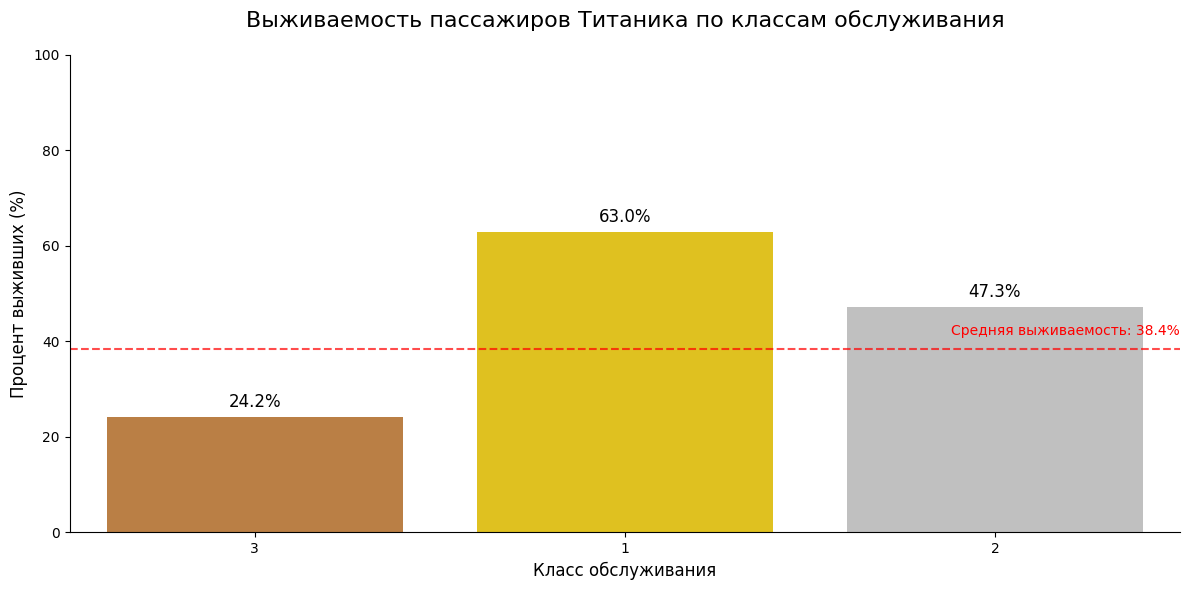

In [ ]:
# Создаем фигуру
plt.figure(figsize=(12, 6))

# Подготовка данных - преобразуем Pclass в строки для правильного отображения
plot_data = df.copy()
plot_data['Pclass'] = plot_data['Pclass'].astype(str)  # Преобразуем в строки

# График выживаемости по классам с новым синтаксисом
ax = sns.barplot(x='Pclass', y='Survived', hue='Pclass', data=plot_data,
                 palette={'1': '#FFD700', '2': '#C0C0C0', '3': '#CD7F32'},
                 errorbar=None, estimator=lambda x: sum(x)/len(x)*100,
                 legend=False)  # Убираем легенду

# Настройки графика
plt.title('Выживаемость пассажиров Титаника по классам обслуживания', fontsize=16, pad=20)
plt.xlabel('Класс обслуживания', fontsize=12)
plt.ylabel('Процент выживших (%)', fontsize=12)
plt.ylim(0, 100)


# Добавляем значения процентов на столбцы
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 2,
           f'{height:.1f}%', ha='center', fontsize=12)

# Рассчитываем и добавляем общую статистику
total_survival = df['Survived'].mean() * 100
plt.axhline(y=total_survival, color='red', linestyle='--', alpha=0.7)
plt.text(2.5, total_survival + 3,
         f'Средняя выживаемость: {total_survival:.1f}%',
         color='red', ha='right')

sns.despine()
plt.tight_layout()
plt.show()

Данная гипотеза оказалась оправдана. Выживаемость первого и второго класса выше, чем у третьего.

### Гипотеза №4. Помощь родственников
Могу предположить, что пассажир, имеющий как минимум одного родственника на борту - обладал большим шансом на выживание, поскольку он мог рассчитывать на помощь от близкого. Проверим это:

In [ ]:
#Создадим новый dataframe для объединения атрибутов SibSp и Parch
ndf = df.copy()
ndf['FullFamily'] = df['SibSp'] + df['Parch']

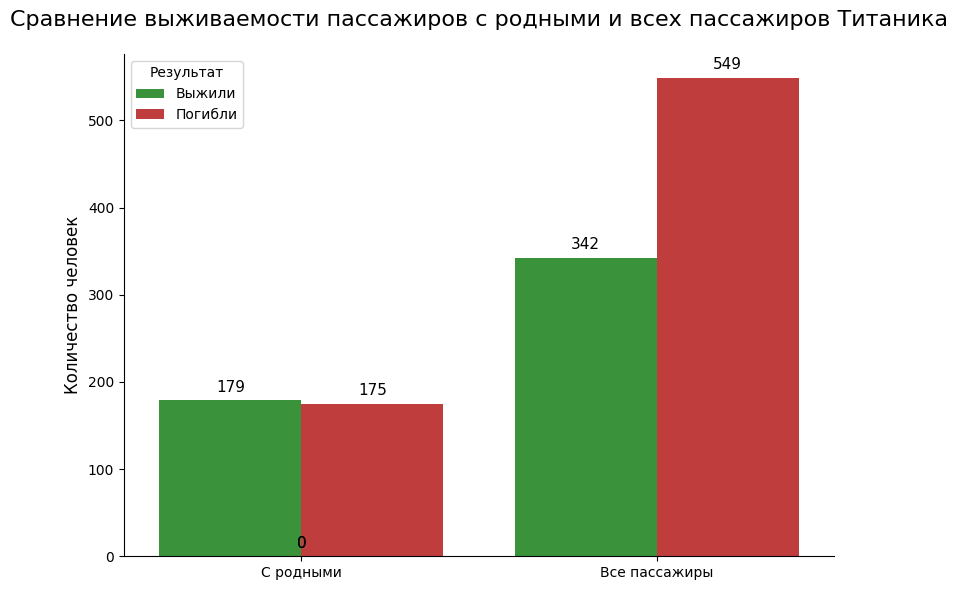

Процент выживших пассажиров:
С родными: 50.6%
Без родных: 30.4%
Все: 38.4%


In [ ]:
notAlone = ndf[ndf['FullFamily'] >= 1]
IsAlone = ndf[ndf['FullFamily'] == 0]

# Создаем данные для сравнения
comparison_data = pd.DataFrame({
    'Группа': ['С родными', 'Все пассажиры', 'С родными', 'Все пассажиры'],
    'Результат': ['Выжили', 'Выжили', 'Погибли', 'Погибли'],
    'Количество': [
        notAlone['Survived'].sum(),
        df['Survived'].sum(),
        (notAlone['Survived'] == 0).sum(),
        (df['Survived'] == 0).sum()
    ]
})

# Создаем график
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Группа', y='Количество', hue='Результат',
                 data=comparison_data,
                 palette={'Выжили': '#2ca02c', 'Погибли': '#d62728'})

# Настройки графика
plt.title('Сравнение выживаемости пассажиров с родными и всех пассажиров Титаника', fontsize=16, pad=20)
plt.xlabel('')
plt.ylabel('Количество человек', fontsize=12)

# Добавляем подписи с абсолютными значениями
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 10,
           f'{int(height)}', ha='center', fontsize=11)

sns.despine()
plt.tight_layout()
plt.show()

# Добавляем проценты выживаемости
alone_survived_pct = IsAlone['Survived'].mean() * 100
notalone_survived_pct = notAlone['Survived'].mean() * 100
total_survived_pct = df['Survived'].mean() * 100

# Выводим результаты
print("Процент выживших пассажиров:")
print(f"С родными: {notalone_survived_pct:.1f}%")
print(f"Без родных: {alone_survived_pct:.1f}%")
print(f"Все: {total_survived_pct:.1f}%")

### Гипотеза №5. О портах
Рассуждая здраво - вряд ли географическое расположение порта как-либо могло повлиять на вероятность выживания на корабле. Однако, состоятельность пассажиров разных портов могла различаться, соответственно и их классы билетов. Проверим выживаемость в зависимости от порта:

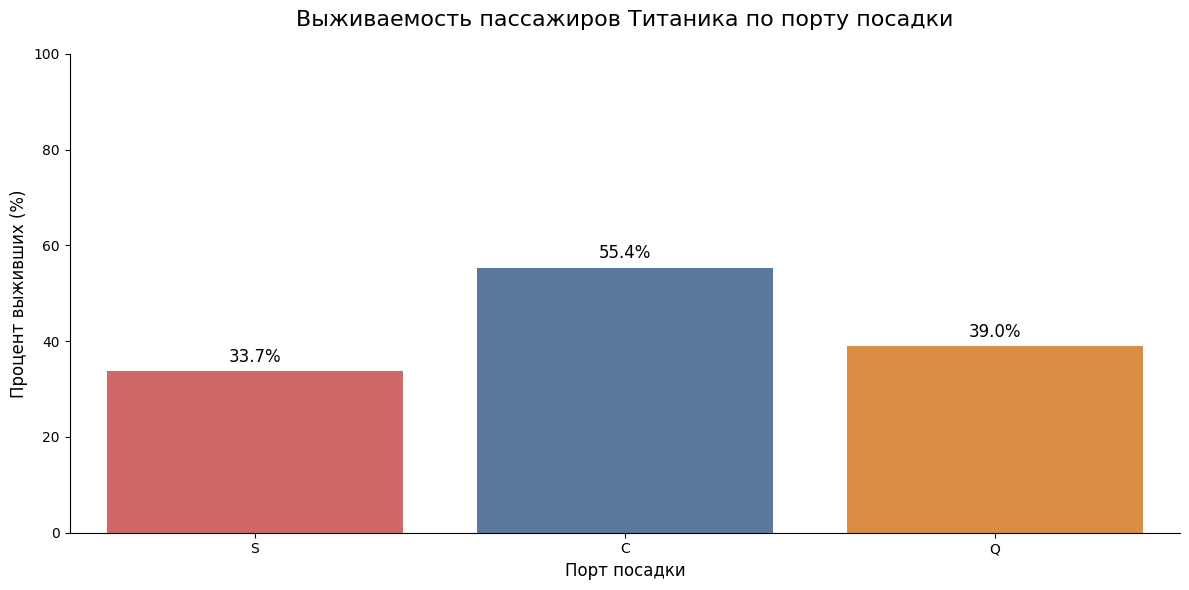

In [ ]:
# Создаем фигуру
plt.figure(figsize=(12, 6))

plot1_data = df.copy()

# График выживаемости по классам с новым синтаксисом
ax = sns.barplot(x='Embarked', y='Survived', hue='Embarked', data=plot1_data,
                 palette={'S': '#e15759', 'C': '#4e79a7', 'Q': '#f28e2b'},
                 errorbar=None, estimator=lambda x: sum(x)/len(x)*100,
                 legend=False)  # Убираем легенду

# Настройки графика
plt.title('Выживаемость пассажиров Титаника по порту посадки', fontsize=16, pad=20)
plt.xlabel('Порт посадки', fontsize=12)
plt.ylabel('Процент выживших (%)', fontsize=12)
plt.ylim(0, 100)


# Добавляем значения процентов на столбцы
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 2,
           f'{height:.1f}%', ha='center', fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()

Теперь проверим соотношение классов билета, разделяя пассажиров ещё и по портам:

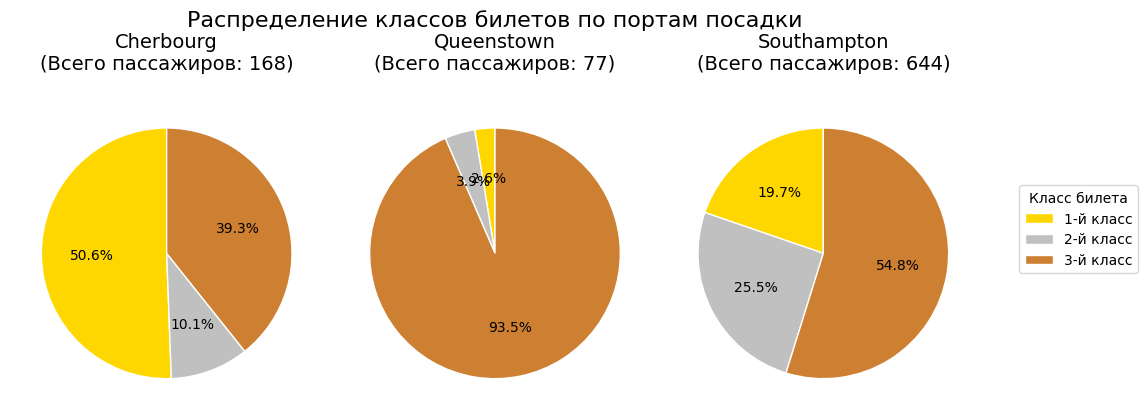

In [ ]:
# Настройки визуализации
colors = ['#FFD700', '#C0C0C0', '#CD7F32']  # Золото, серебро, бронза
class_labels = ['1-й класс', '2-й класс', '3-й класс']
port_names = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}

# Создаем фигуру с тремя подграфиками
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
plt.subplots_adjust(wspace=0.4)

# Для каждого порта создаем круговую диаграмму
for i, port in enumerate(['C', 'Q', 'S']):
    # Получаем данные для порта
    port_data = df[df['Embarked'] == port]
    class_counts = port_data['Pclass'].value_counts().sort_index()

    # Создаем круговую диаграмму
    axes[i].pie(class_counts,
                autopct='%1.1f%%',
                startangle=90,
                colors=colors,
                wedgeprops={'edgecolor': 'white', 'linewidth': 1})

    # Настройка заголовка
    total_passengers = len(port_data)
    axes[i].set_title(f"{port_names[port]}\n(Всего пассажиров: {total_passengers})",
                     fontsize=14, pad=20)

# Общий заголовок
fig.suptitle('Распределение классов билетов по портам посадки', fontsize=16, y=1.05)

# Добавляем легенду
fig.legend(class_labels, title='Класс билета',
          loc='center right', bbox_to_anchor=(1.15, 0.5))

plt.tight_layout()
plt.show()

Получили интересную статистику. Пассажиры из Шербурга имели высокую выживаемость, потому что больше половины из них оказалась в 1-ом классе. Однако, 90+% пассажиров из Куинстоуна имели билет третьего класса, но по итогу их процент выживаемости больше, чем у пассажиров из Саутгемптона. Возможно данная стастистика не совсем объективна из-за малого количества пасажиров из Куинстауна. Так что теория оправдалась частично. Сложно выделить 100%ую закономерность.

Думаю, что всё же порты стоит оставить в таблице перед Feature Engineering

### Гипотеза №6. Стоимость билета
Стоит выяснить влияет ли стоимость билета, хотя это очевидно, поскольку класс билета напрямую коррелирует со стоимостью, а мы уже выяснили, что класс билета влияет на выживаемость. Всё же проверим:

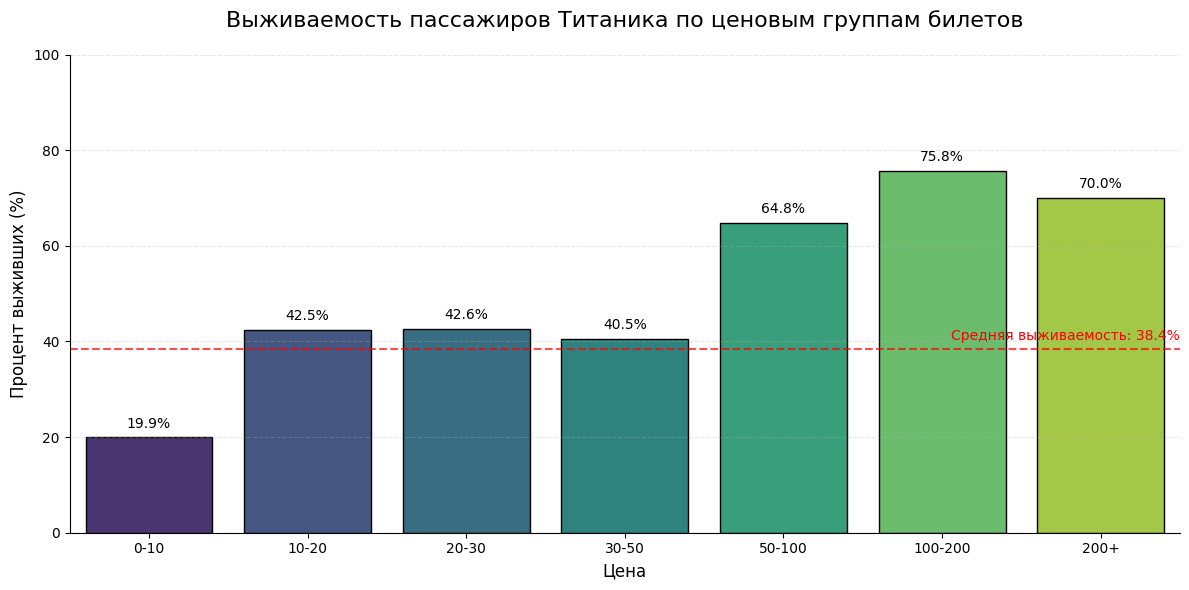

In [ ]:
ndf = df.copy()

# Создаем ценовые группы
bins = [0, 10, 20, 30, 50, 100, 200, float('inf')]
labels = ['0-10', '10-20', '20-30', '30-50', '50-100', '100-200', '200+']
ndf['FareGroup'] = pd.cut(ndf['Fare'], bins=bins, labels=labels, right=False)

# Рассчитываем выживаемость по группам
survival_by_fare = ndf.groupby('FareGroup', observed=True)['Survived'].agg(['mean', 'count'])
survival_by_fare['mean'] = survival_by_fare['mean'] * 100  # Преобразуем в проценты

# Создаем фигуру
plt.figure(figsize=(12, 6))

# График выживаемости
ax = sns.barplot(x=survival_by_fare.index, y='mean', data=survival_by_fare,  hue=survival_by_fare.index,
                 palette='viridis', edgecolor='black', legend =False)

# Настройки оформления
plt.title('Выживаемость пассажиров Титаника по ценовым группам билетов', fontsize=16, pad=20)
plt.xlabel('Цена', fontsize=12)
plt.ylabel('Процент выживших (%)', fontsize=12)
plt.ylim(0, 100)

# Добавляем подписи с процентами и количеством
for i, (_, row) in enumerate(survival_by_fare.iterrows()):
    ax.text(i, row['mean'] + 2, f"{row['mean']:.1f}%",
            ha='center', fontsize=10)


# Добавляем среднюю линию
avg_survival = df['Survived'].mean() * 100
plt.axhline(y=avg_survival, color='red', linestyle='--', alpha=0.7)
plt.text(len(labels)-0.5, avg_survival + 2,
         f'Средняя выживаемость: {avg_survival:.1f}%',
         color='red', ha='right')

sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



Анализ показывает четкую зависимость: чем дороже был билет, тем выше были шансы на выживание. Пассажиры с билетами за 50+ £ имели выживаемость значительно выше средней.

### Гипотеза №7. Влияние титула
Проверим выживаемость пассажиров в зависимости от титула

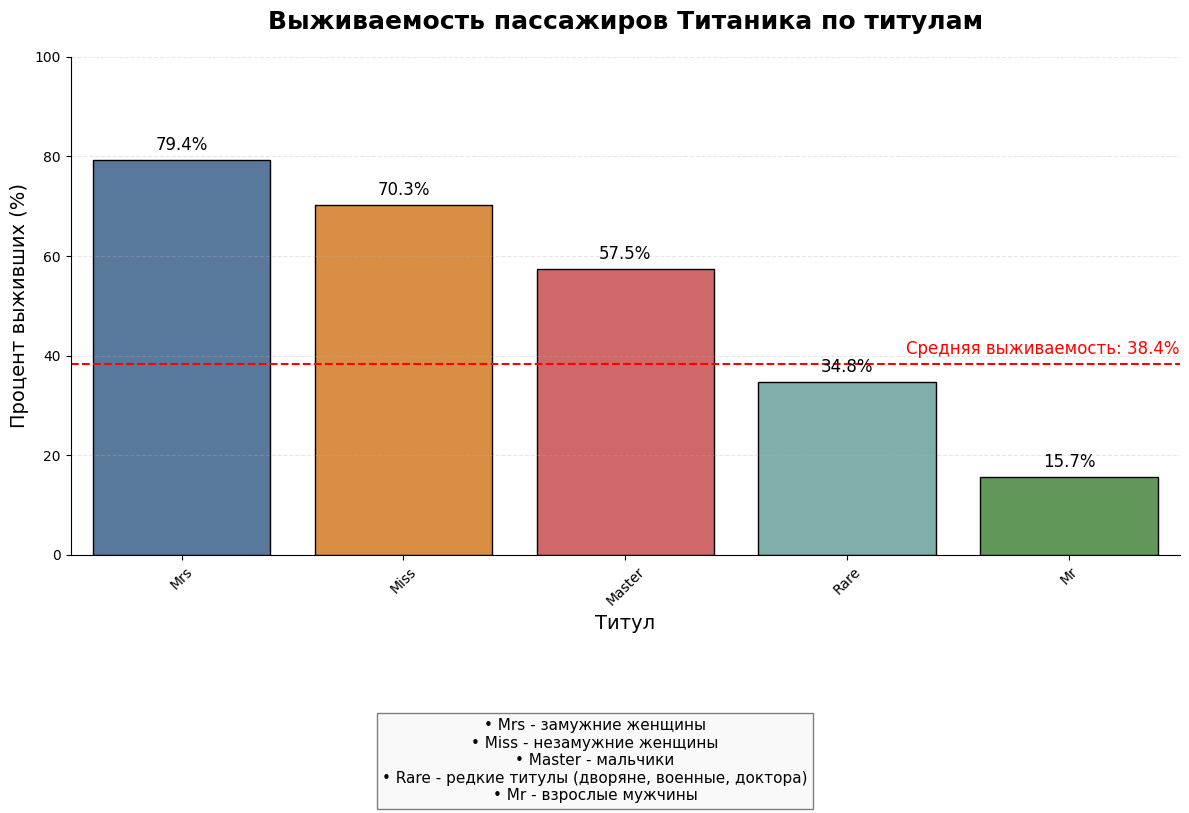

In [ ]:
ndf = df.copy()
# Извлекаем титулы и нормализуем
ndf['Title'] = ndf['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
ndf['Title'] = ndf['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
ndf['Title'] = ndf['Title'].replace('Mlle', 'Miss')
ndf['Title'] = ndf['Title'].replace('Ms', 'Miss')
ndf['Title'] = ndf['Title'].replace('Mme', 'Mrs')

# Группируем данные
title_survival = ndf.groupby('Title')['Survived'].agg(['mean', 'count'])
title_survival['mean'] = title_survival['mean'] * 100  # В проценты
title_survival = title_survival.sort_values('mean', ascending=False)

# Создаем фигуру
plt.figure(figsize=(12, 7))

# Цветовая палитра
colors = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f']

# График выживаемости
ax = sns.barplot(x=title_survival.index,
                 y='mean',
                 hue=title_survival.index,
                 palette=colors,
                 data=title_survival,
                 edgecolor='black',
                 dodge=False,
                 legend=False)

# Настройки оформления
plt.title('Выживаемость пассажиров Титаника по титулам', fontsize=18, pad=20, weight='bold')
plt.xlabel('Титул', fontsize=14)
plt.ylabel('Процент выживших (%)', fontsize=14)
plt.ylim(0, 100)
plt.xticks(rotation=45)

# Добавляем аннотации
for i, (title, row) in enumerate(title_survival.iterrows()):
    ax.text(i, row['mean'] + 2,
            f"{row['mean']:.1f}%",
            ha='center', fontsize=12)

# Средняя линия
avg_survival = df['Survived'].mean() * 100
plt.axhline(avg_survival, color='red', linestyle='--', linewidth=1.5)
plt.text(len(title_survival)-0.5, avg_survival + 2,
         f'Средняя выживаемость: {avg_survival:.1f}%',
         ha='right', color='red', fontsize=12)

# Улучшаем внешний вид
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

# Дополнительная информация
details = "\n".join([
    "• Mrs - замужние женщины",
    "• Miss - незамужние женщины",
    "• Master - мальчики",
    "• Rare - редкие титулы (дворяне, военные, доктора)",
    "• Mr - взрослые мужчины"
])

plt.figtext(0.5, -0.15, details, ha='center', fontsize=11,
            bbox=dict(facecolor='whitesmoke', alpha=0.5))

plt.subplots_adjust(bottom=0.2)
plt.show()


Разница в выживаемости ярко демонстрирует принцип "женщины и дети первыми", который применялся при посадке в шлюпки. Привилегированный статус (титулы Rare) давал некоторое преимущество по сравнению с обычными мужчинами, но значительно уступал приоритету женщин и детей.

## Выводы по EDA:


---


1. Женщины имеют самый большой шанс на выживание
2. Дети также имеют шанс на выживание выше среднего
3. У пожилых шансы выжить крайне малы
4. Пассажиры первого класса имели в разы большие шансы на выживание
5. Пассажиры с наличием как минимум одного родного человека имели бОльшие шансы на выживание
6. Пассажиры из Шербурга имели высокую выживаемость, потому что больше половины из них оказалась в 1-ом классе.
7. Пассажиры с билетами за 50+ £ имели выживаемость значительно выше средней.
8. Разделение пассажиров по титулам подтвердило ранее проведённый анализ - женщины и дети имели бОльшие шансы на выживание

# Корреляция признаков с целевой переменной


---



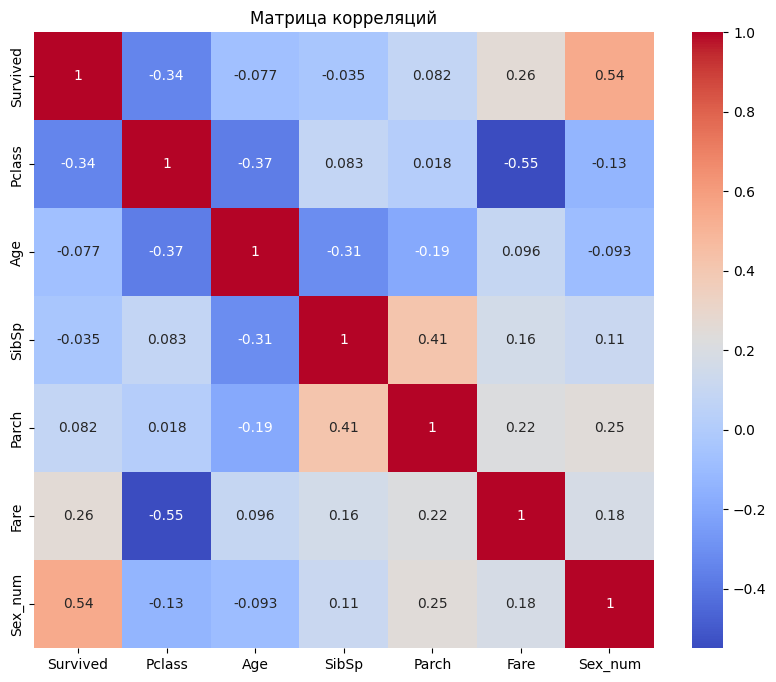

In [ ]:
corr_df = df.copy()
# Создадим числовую версию пола
corr_df['Sex_num'] = corr_df['Sex'].map({'male': 0, 'female': 1})

# Корреляция
corr = corr_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_num']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Матрица корреляций')
plt.show()

Из данной матрицы корреляций можем выделить, что наибольшую корреляцию с выживаемостью имеют пол (0.54) и класс каюты (-0.34). Стоимость билета также положительно коррелирует с выживаемостью (0.26).

# 👨‍💻 Feature Engineering


---



По проделанное ранее работе и сформированным выводам можем приступить к этапу Fetaure Engineering, где предстоит добавить новые признаки и избавиться от неинформативных.

In [ ]:
# Создаём новый df, куда будем вносить все изменения
FE_df = df.copy()


Начнём с создания нового признака: титул. Как мы поняли ранее, есть тесная взаимосвязь выживаемости с титулом пассажира, поскольку приоритет при спасении был у женщин и детей. Вдобавок, в дальнейшем титул нам поможет заполнить пропуски в параметре Age.

In [ ]:
le = LabelEncoder()
# Извлекаем титулы и нормализуем
FE_df['Title'] = FE_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
FE_df['Title'] = FE_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
FE_df['Title'] = FE_df['Title'].replace('Mlle', 'Miss')
FE_df['Title'] = FE_df['Title'].replace('Ms', 'Miss')
FE_df['Title'] = FE_df['Title'].replace('Mme', 'Mrs')
print (FE_df['Title'].value_counts())
FE_df['Title'] = le.fit_transform(FE_df['Title']) #Кодируем категориальные признаки


Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64


Теперь поработаем с возрастом. Считаю, что стоит разделить пассажиров по возрастным группам, а имеющиеся пропуски в категории Age заполнить, основываясь на титуле.

In [ ]:
# Заполнение пропущенных значений в возрасте
# Используем медиану по титулу

# Средний возраст для каждого титула
title_medians = FE_df.groupby('Title')['Age'].mean()

# Функция для заполнения пропусков
def fill_age(row):
    if pd.isna(row['Age']):
        return title_medians.get(row['Title'], row['Age'])  # Заполняем средним по титулу
    return row['Age']

# Применяем функцию для заполнения пропусков в столбце Age
FE_df['Age'] = FE_df.apply(fill_age, axis=1)

# Создадим возрастные группы, где:
''' 1: 'Infant (0-5)'       Младенцы (высокий приоритет)
    2: 'Child (6-12)'       Дети
    3: 'Teen (13-18)'       Подростки
    4: 'YoungAdult (19-30)' Молодые взрослые
    5: 'Adult (31-50)'      Взрослые
    6: 'Senior (51-65)'     Пожилые
    7: 'Elderly (65+)'       Старшее поколение
'''
FE_df['AgeGroup'] = pd.cut(FE_df['Age'], bins=[0, 5, 12, 18, 30, 50, 65, 100], labels=[1,2,3,4,5,6,7], right=False)
print (FE_df['AgeGroup'].value_counts())
#Оценка пропусков df
print ("Пропущенных значений в возрасте:", FE_df['Age'].isna().sum())


AgeGroup
5    393
4    307
6     63
3     45
1     44
2     28
7     11
Name: count, dtype: int64
Пропущенных значений в возрасте: 0


Аналогично выделим группы по стоимости билетов, поскольку мы увидели разницу в выживаемости у обладателей дешёвых и дорогих билетов

In [ ]:
# Создадим группы по стоимости билетов, где:
''' 1: 0-10£
    2: 10-20£
    3: 20-30£
    4: 30-50£
    5: 50-100£
    6: 100-200£
    7: 200+£
'''
FE_df['FareGroup'] = pd.cut(FE_df['Fare'], bins=[0, 10, 20, 30, 50, 100, 200, float('inf')], labels=[1,2,3,4,5,6,7], right=False)
print (FE_df['FareGroup'].value_counts())

FareGroup
1    336
2    179
3    136
5    108
4     79
6     33
7     20
Name: count, dtype: int64


Теперь займёмся оптимизацией счётчиков родных у пассажира. Для этого введём параметры FamilySize и IsAlone. Я считаю, что последний так же необходим, поскольку делает акцент на полном отсутствии родственников (как показал EDA: 30% выживаемости)

In [ ]:
FE_df['FamilySize'] = FE_df['SibSp'] + FE_df['Parch'] + 1  # +1 для самого пассажира
FE_df['IsAlone'] = (FE_df['FamilySize'] == 1).astype(int)

Завершим работу, отредактировав оставшиеся признаки:

In [ ]:
# Заполним по признаку наибольшего количества пассажиров с этого порта
FE_df['Embarked'] = FE_df['Embarked'].fillna('S')
# Кодирование категориальных признаков
FE_df['Sex'] = le.fit_transform(FE_df['Sex'])
FE_df['Embarked'] = le.fit_transform(FE_df['Embarked'])
FE_df['AgeGroup'] = le.fit_transform(FE_df['AgeGroup']) #Значения сместились на -1
FE_df['FareGroup'] = le.fit_transform(FE_df['FareGroup']) #Значения сместились на -1


In [ ]:
# Удаление ненужных колонок
FE_df = FE_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

Проверим, какие у нас остались парамтеры и полностью ли мы избавились от категориальных параметров; избавились ли от пропусков значений:

In [ ]:
FE_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Sex         891 non-null    int64   
 3   Age         891 non-null    float64 
 4   SibSp       891 non-null    int64   
 5   Parch       891 non-null    int64   
 6   Fare        891 non-null    float64 
 7   Embarked    891 non-null    int64   
 8   Title       891 non-null    int64   
 9   AgeGroup    891 non-null    category
 10  FamilySize  891 non-null    int64   
 11  IsAlone     891 non-null    int64   
 12  FareGroup   891 non-null    category
dtypes: category(2), float64(2), int64(9)
memory usage: 79.1 KB


Выведем первые 10 строк, чтобы убедиться, что всё в порядке:

In [ ]:
FE_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup,FamilySize,IsAlone,FareGroup
0,0,3,1,22.00000,1,0,7.2500,2,2,3,2,0,0
1,1,1,0,38.00000,1,0,71.2833,0,3,4,2,0,4
2,1,3,0,26.00000,0,0,7.9250,2,1,3,1,1,0
3,1,1,0,35.00000,1,0,53.1000,2,3,4,2,0,4
4,0,3,1,35.00000,0,0,8.0500,2,2,4,1,1,0
5,0,3,1,32.36809,0,0,8.4583,1,2,4,1,1,0
6,0,1,1,54.00000,0,0,51.8625,2,2,5,1,1,4
7,0,3,1,2.00000,3,1,21.0750,2,0,0,5,0,2
8,1,3,0,27.00000,0,2,11.1333,2,3,3,3,0,1
9,1,2,0,14.00000,1,0,30.0708,0,3,2,2,0,3


Выглядит отлично. Осталось лишь продемонстрировать корреляционную матрицу и удалить колонку Survived для дальнейшего обучения.

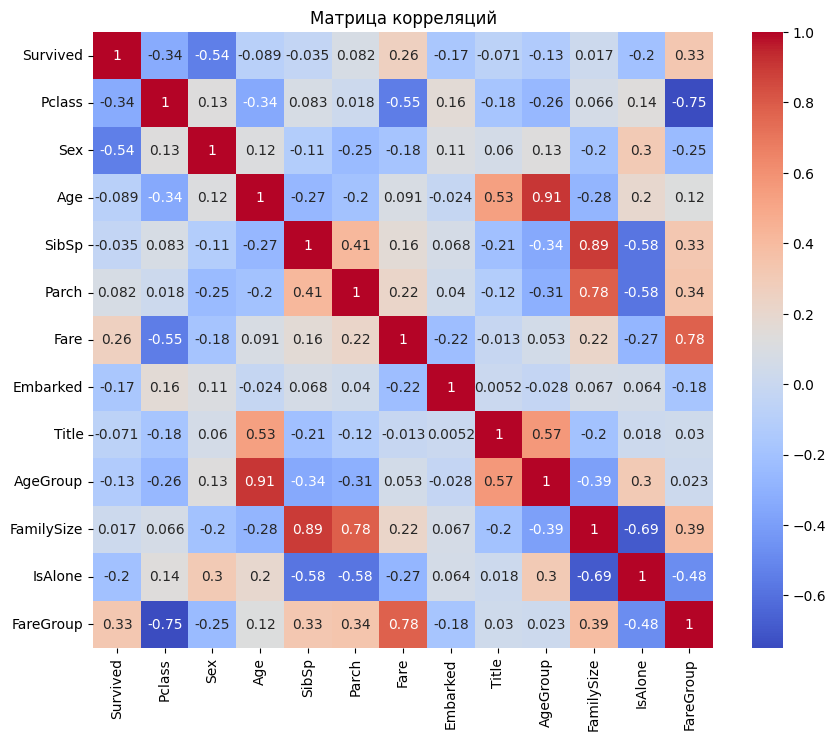

In [ ]:
# Корреляция
corr = FE_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Матрица корреляций')
plt.show()

Можем заметить, что такие колонки как: FareGroup, IsAlone, AgeGroup показывают умеренную корреляцию с целевой переменной.

# Простая модель


---

Попробуем создать и обучить простую модель для дальнейшего Feature Importances

In [ ]:
x = FE_df.drop(columns=['Survived'])
y = FE_df['Survived']

Создаём функцию для вывода метрик

In [ ]:
def plot_training_results(history, model, X_test, y_test):

    # Создаем фигуру с двумя подграфиками
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # График функции потерь
    ax1.plot(history.history['loss'], label='Обучающая выборка')
    ax1.plot(history.history['val_loss'], label='Валидационная выборка')
    ax1.set_title('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # График точности
    ax2.plot(history.history['accuracy'], label='Обучающая выборка')
    ax2.plot(history.history['val_accuracy'], label='Валидационная выборка')
    ax2.set_title('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    # Предсказания модели
    y_pred = (model.predict(X_test) > 0.5).astype(int)

    # Отчет классификации
    print("\nОтчет классификации:")
    print(classification_report(y_test, y_pred,
                              target_names=['Погиб', 'Выжил'],
                              digits=2))

    # Матрица ошибок
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=['Предсказан погибшим', 'Предсказан выжившим'],
                yticklabels=['Фактически погиб', 'Фактически выжил'])
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Истинные значения')
    plt.title('Матрица ошибок')
    plt.show()


Пробуем обучить стандартную модель

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3466 - loss: 0.7953 - val_accuracy: 0.4336 - val_loss: 0.6954
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6139 - loss: 0.6782 - val_accuracy: 0.7343 - val_loss: 0.6232
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7373 - loss: 0.6182 - val_accuracy: 0.7343 - val_loss: 0.5747
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7674 - loss: 0.5696 - val_accuracy: 0.7413 - val_loss: 0.5391
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7808 - loss: 0.5405 - val_accuracy: 0.7622 - val_loss: 0.5073
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7778 - loss: 0.5255 - val_accuracy: 0.7832 - val_loss: 0.4747
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8042 - loss: 0.4906 - val_accuracy: 0.7972 - val_loss: 0.4479
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8090 - loss: 0.4763 - val_accuracy: 0.8531 - val_loss: 0.4266
Ep

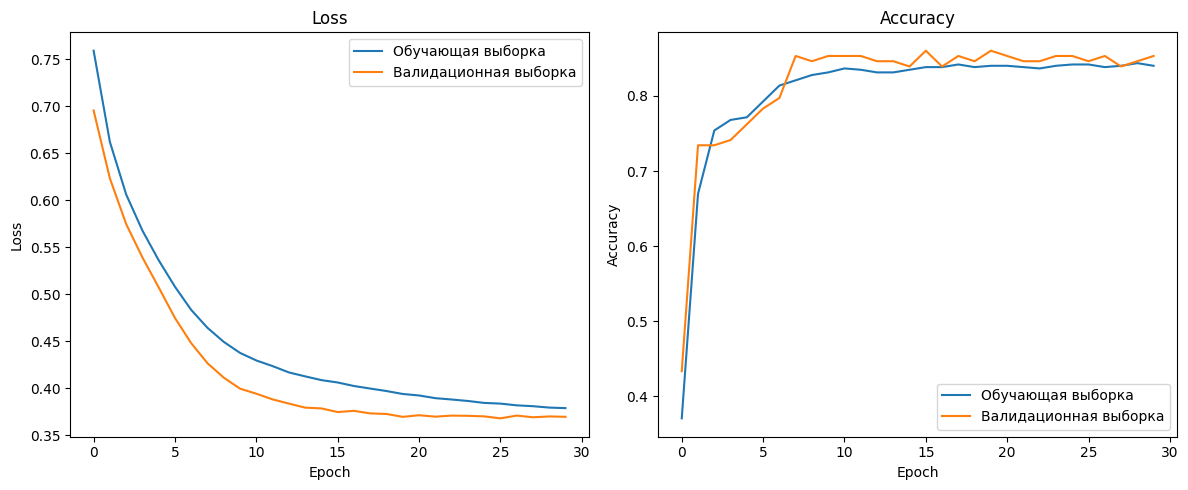

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Отчет классификации:
              precision    recall  f1-score   support

       Погиб       0.83      0.90      0.86       105
       Выжил       0.83      0.74      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



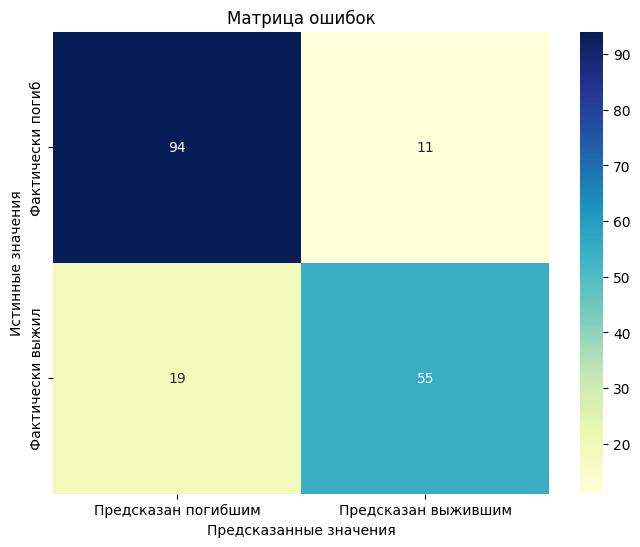

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
base_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.2f}')

plot_training_results(history, model, X_test, y_test)


Получили довольно хороший результат до внесения корректировок. Модель не переобучается и показывает отличную обобщающую способность. Попробуем проанализировать важность всех признаков и убрать менее влиятельные.

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


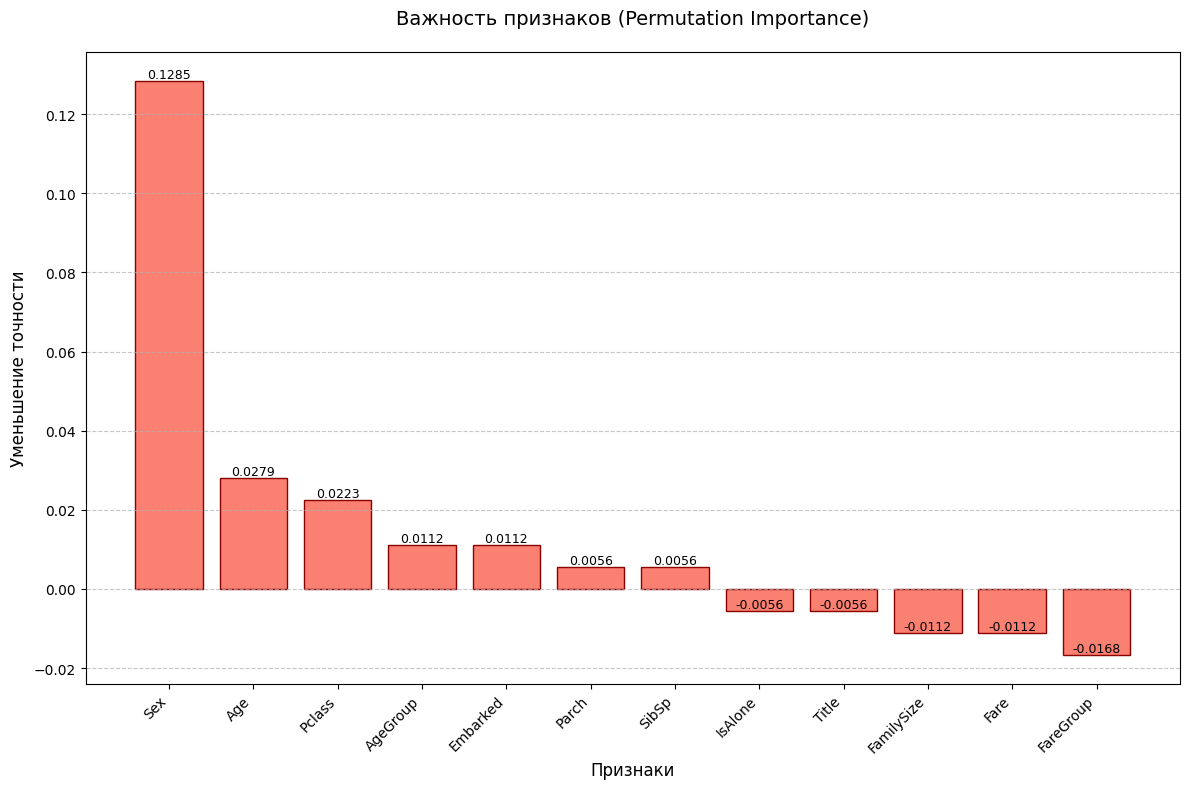


Рейтинг важности признаков:
   Признак  Важность  Ранг
       Sex    0.1285     1
       Age    0.0279     2
    Pclass    0.0223     3
  AgeGroup    0.0112     4
  Embarked    0.0112     5
     Parch    0.0056     6
     SibSp    0.0056     7
   IsAlone   -0.0056     8
     Title   -0.0056     9
FamilySize   -0.0112    10
      Fare   -0.0112    11
 FareGroup   -0.0168    12

Признаки с отрицательной важностью (могут быть неинформативными или шумовыми):
   Признак  Важность  Ранг
   IsAlone   -0.0056     8
     Title   -0.0056     9
FamilySize   -0.0112    10
      Fare   -0.0112    11
 FareGroup   -0.0168    12


In [ ]:
importances = []
feature_names = x.columns  # Используем названия столбцов из DataFrame

for i in range(X_test.shape[1]):
    X_test_permuted = X_test.copy()
    np.random.shuffle(X_test_permuted[:, i])
    y_pred_perm = (model.predict(X_test_permuted) > 0.5).astype("int32")
    acc = accuracy_score(y_test, y_pred_perm)
    importances.append(base_accuracy - acc)  # Чем больше падение точности — тем важнее признак

importances = np.array(importances)
indices = np.argsort(importances)[::-1]  # Сортируем по убыванию важности

# === Визуализация ===
plt.figure(figsize=(12, 8))
plt.title("Важность признаков (Permutation Importance)", fontsize=14, pad=20)
bars = plt.bar(range(X_test.shape[1]),
               importances[indices],
               color="salmon",
               edgecolor='darkred')

# Добавляем значения на график
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom', fontsize=9)

plt.xticks(range(X_test.shape[1]),
           [feature_names[i] for i in indices],  # Используем настоящие названия признаков
           rotation=45,
           ha='right',
           fontsize=10)
plt.ylabel("Уменьшение точности", fontsize=12)
plt.xlabel("Признаки", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# === Таблица с результатами ===
importance_df = pd.DataFrame({
    'Признак': [feature_names[i] for i in indices],
    'Важность': importances[indices],
    'Ранг': range(1, len(indices)+1)
})

print("\nРейтинг важности признаков:")
print(importance_df.to_string(index=False, float_format="%.4f"))

# Дополнительно: анализ признаков с отрицательной важностью
negative_importance = importance_df[importance_df['Важность'] < 0]
if not negative_importance.empty:
    print("\nПризнаки с отрицательной важностью (могут быть неинформативными или шумовыми):")
    print(negative_importance.to_string(index=False, float_format="%.4f"))
else:
    print("\nВсе признаки имеют положительную важность.")

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4001 - loss: 0.7399 - val_accuracy: 0.6434 - val_loss: 0.6768
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6047 - loss: 0.6767 - val_accuracy: 0.7273 - val_loss: 0.6046
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6778 - loss: 0.6278 - val_accuracy: 0.7832 - val_loss: 0.5445
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7614 - loss: 0.5576 - val_accuracy: 0.7902 - val_loss: 0.4898
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7498 - loss: 0.5311 - val_accuracy: 0.8182 - val_loss: 0.4500
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7494 - loss: 0.4988 - val_accuracy: 0.8252 - val_loss: 0.4249
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7879 - loss: 0.5044 - val_accuracy: 0.8392 - val_loss: 0.4070
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7930 - loss: 0.4787 - val_accuracy: 0.8392 - val_loss: 0.3972
Ep

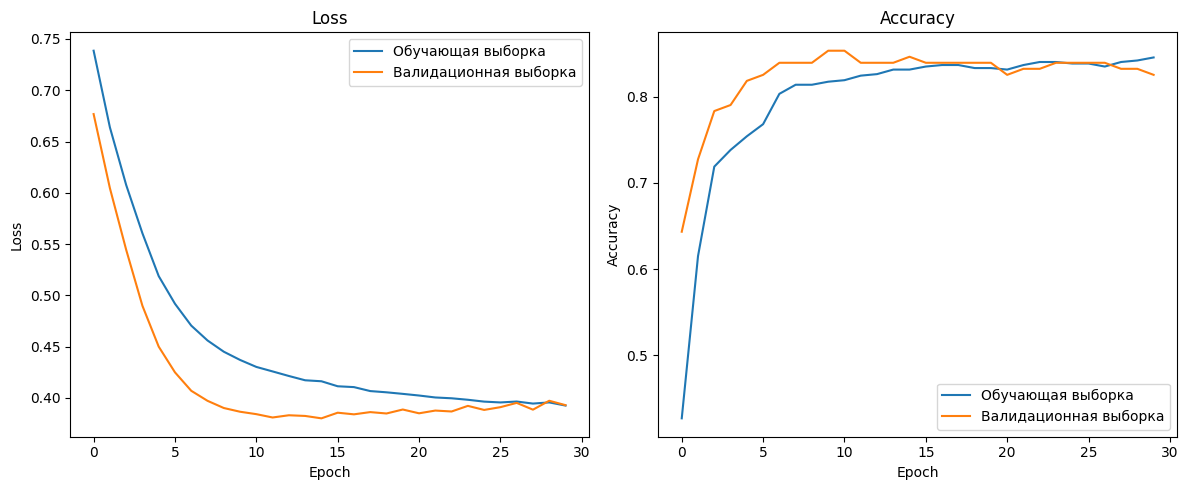

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

Отчет классификации:
              precision    recall  f1-score   support

       Погиб       0.82      0.90      0.86       105
       Выжил       0.84      0.72      0.77        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



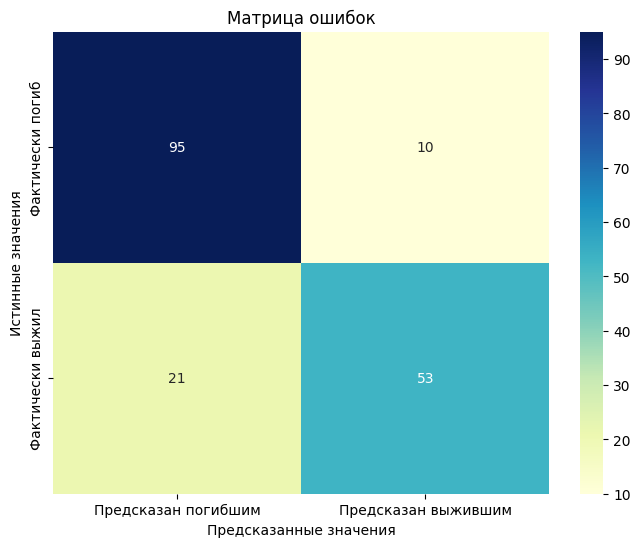

In [ ]:
testdf = FE_df.copy()
x1 = testdf.drop(columns=['Survived','FareGroup', 'Fare' , 'FamilySize', 'Title', 'IsAlone'])
y1 = testdf['Survived']

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
base_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.2f}')

plot_training_results(history, model, X_test, y_test)


Получили аналогично хороший результат. Получается, что с пунктом Feature Engineering удалось неплохо справиться, и корректировка признаков особо не требуется. Значит стоит поработать над моделью

# 👩‍🎓Эксперименты с моделями

Попробуем сначала поэкспериментировать с моделью из прошлого пункта, затем применим модели из семейств линейные, деревья, модификации градиентного бустинга.

Оптимизируем архитектуру сети, добавим callback'и, увеличим эпохи (поскольку включим EarlyStopping), применим функцию активации leaky_relu, применим l2 регуляризацию

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6348 - loss: 3.5316 - val_accuracy: 0.8392 - val_loss: 3.0265 - learning_rate: 0.0010
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7970 - loss: 2.9006 - val_accuracy: 0.8462 - val_loss: 2.4733 - learning_rate: 0.0010
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8065 - loss: 2.4075 - val_accuracy: 0.8182 - val_loss: 2.0416 - learning_rate: 0.0010
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8004 - loss: 2.0188 - val_accuracy: 0.8322 - val_loss: 1.7062 - learning_rate: 0.0010
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7937 - loss: 1.7017 - val_accuracy: 0.8462 - val_loss: 1.4447 - learning_rate: 0.0010
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8056 - loss: 1.4307 - val_accuracy: 0.8462 - val_loss: 1.2355 - learning_rate: 0.0010
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7932 - loss: 1.2576 - val_accuracy: 0.83

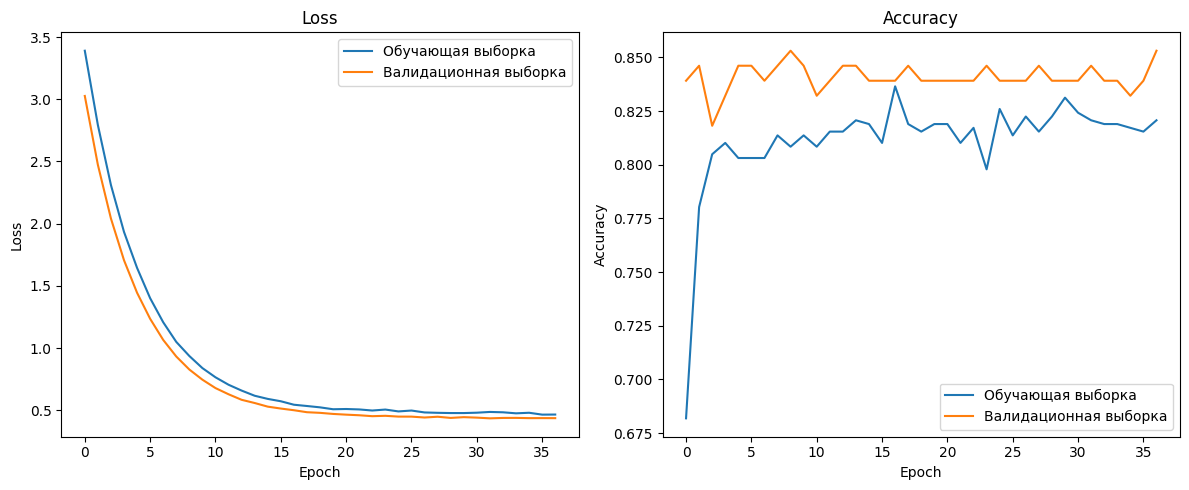

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

Отчет классификации:
              precision    recall  f1-score   support

       Погиб       0.84      0.89      0.86       105
       Выжил       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



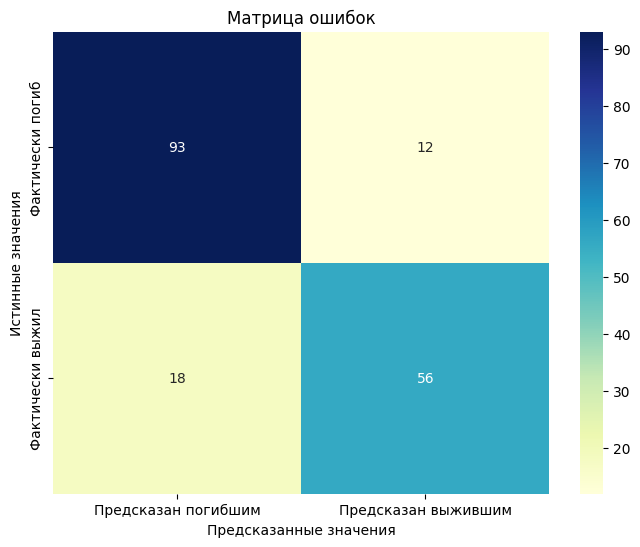

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential()
model.add(Dense(128, activation='leaky_relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='leaky_relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='leaky_relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.05)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.1, patience=3)
]

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_split=0.2, callbacks=callbacks)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

plot_training_results(history, model, X_test, y_test)

Удалось получить более приятные графики по лоссу, но значение accuracy остаётся без изменений. Попробую иные методы обучения:

Реализуем чуть отличную функцию метрик для будущих моделей, поскольку в них нет обучения по эпохам, как и нет атрибута history, в связи с чем нет подобных графиков для loss, var_loss.

In [ ]:
def plot_training_results_sklearn(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Для ROC и PR

    # === Основные метрики ===
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)

    print(f"\nAccuracy:         {acc:.4f}")
    print(f"F1 Score:         {f1:.4f}")
    print(f"ROC AUC:          {roc:.4f}")
    print(f"Precision-Recall AUC: {pr_auc:.4f}")

    # === Классификационный отчёт ===
    print("\nОтчет классификации:")
    print(classification_report(y_test, y_pred,
                                target_names=['Погиб', 'Выжил'],
                                digits=2))

    # === Матрица ошибок ===
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=['Предсказан погибшим', 'Предсказан выжившим'],
                yticklabels=['Фактически погиб', 'Фактически выжил'])
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Истинные значения')
    plt.title('Матрица ошибок')
    plt.show()

Зададим заново предобработку

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### XGBoost (градиентный бустинг)


Accuracy:         0.8212
F1 Score:         0.7867
ROC AUC:          0.9010
Precision-Recall AUC: 0.8782

Отчет классификации:
              precision    recall  f1-score   support

       Погиб       0.85      0.84      0.85       105
       Выжил       0.78      0.80      0.79        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



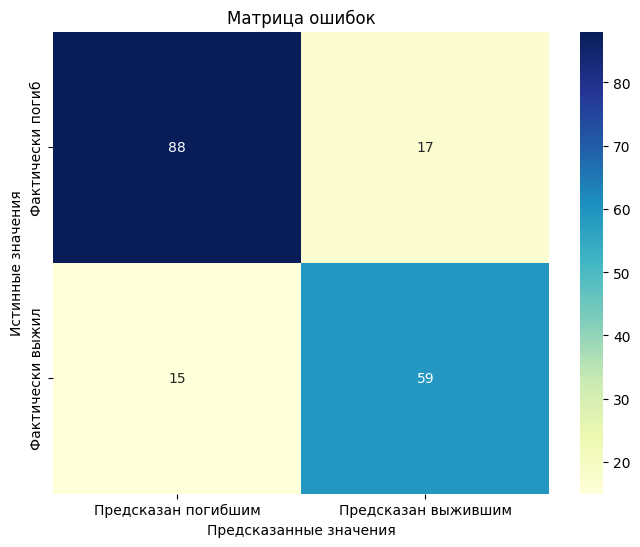

In [ ]:
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
plot_training_results_sklearn(xgb_model, X_test, y_test)

### Случайный лес (деревья решений)


Accuracy:         0.8268
F1 Score:         0.7862
ROC AUC:          0.9001
Precision-Recall AUC: 0.8375

Отчет классификации:
              precision    recall  f1-score   support

       Погиб       0.84      0.87      0.85       105
       Выжил       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



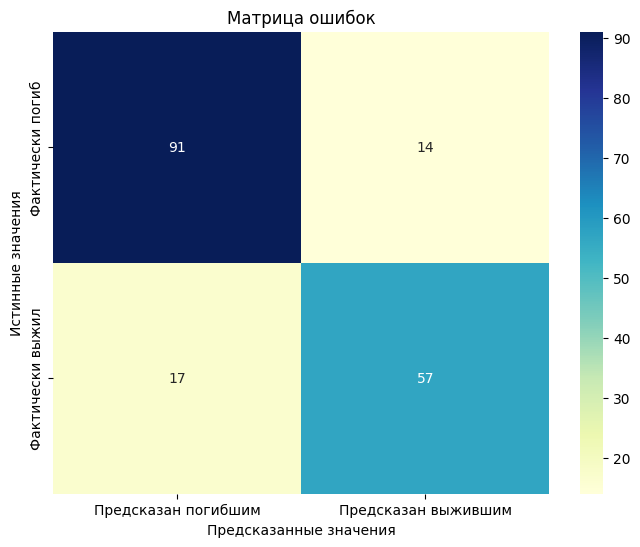

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
plot_training_results_sklearn(rf_model, X_test, y_test)

### Линейная модель (Logistic Regression)


Accuracy:         0.8212
F1 Score:         0.7778
ROC AUC:          0.8954
Precision-Recall AUC: 0.8807

Отчет классификации:
              precision    recall  f1-score   support

       Погиб       0.83      0.87      0.85       105
       Выжил       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



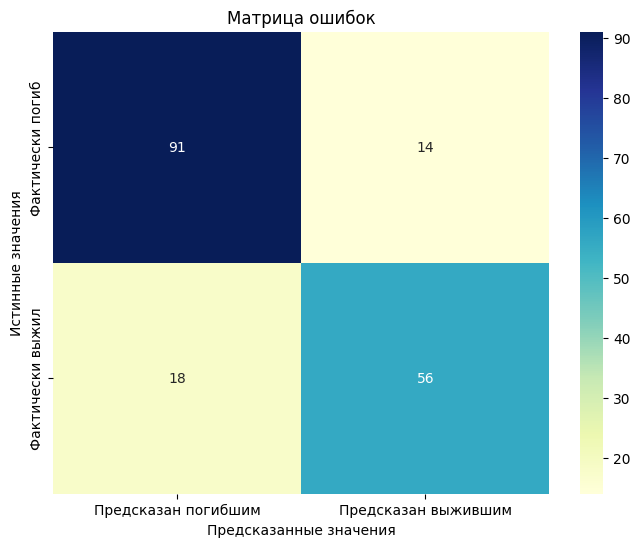

In [ ]:
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)
plot_training_results_sklearn(logreg_model, X_test, y_test)

Получили занимательную статистику - практически все методы дали одинаковые результаты, но первоначальная нейронная сеть всё же выдала чуть лучший результат. Проведём кросс-валидацию именно для него.


===== Fold 1 =====
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Accuracy: 0.8324
Classification Report:
              precision    recall  f1-score   support

       Погиб       0.83      0.90      0.86       105
       Выжил       0.83      0.74      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179


===== Fold 2 =====
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Accuracy: 0.809
Classification Report:
              precision    recall  f1-score   support

       Погиб       0.80      0.93      0.86       111
       Выжил       0.84      0.61      0.71        67

    accuracy                           0.81       178
   macro avg       0.82      0.77      0.78       178
weighted avg       0.81      0.81      0.80       178


===== Fold 3 =====
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Accuracy: 0.8764
Classification Report:
              precision    recall  f1-score   support

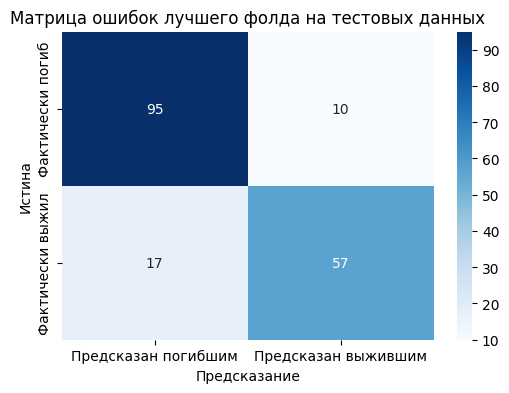

In [ ]:
# Подготовка данных
x1 = testdf.drop(columns=['Survived','FareGroup', 'Fare' , 'FamilySize', 'Title', 'IsAlone'])
y1 = testdf['Survived']

X = x1.values
y = y1.values

# Настройка кросс-валидации
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
histories = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f"\n===== Fold {fold+1} =====")

    # Разделение на фолды
    X_train_fold, X_val_fold = X[train_idx], X[val_idx]
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]

    # Стандартизация
    scaler = StandardScaler()
    X_train_fold = scaler.fit_transform(X_train_fold)
    X_val_fold = scaler.transform(X_val_fold)

    # Создание модели
    model = Sequential()
    model.add(Dense(128, activation='leaky_relu', input_shape=(X_train_fold.shape[1],), kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='leaky_relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='leaky_relu', kernel_regularizer=l2(0.05)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    callbacks = [
        EarlyStopping(patience=5, restore_best_weights=True),
        ReduceLROnPlateau(factor=0.1, patience=3)
    ]

    # Обучение
    history = model.fit(X_train_fold, y_train_fold, epochs=200, batch_size=100,
                        validation_data=(X_val_fold, y_val_fold), callbacks=callbacks, verbose=0)

    # Оценка
    val_preds = (model.predict(X_val_fold) > 0.5).astype(int)
    val_accuracy = np.mean(val_preds.flatten() == y_val_fold)

    accuracy_scores.append(val_accuracy)
    histories.append((history, model, scaler))

    # Метрики
    print("Accuracy:", round(val_accuracy, 4))
    print("Classification Report:")
    print(classification_report(y_val_fold, val_preds,
                                target_names=['Погиб', 'Выжил'], digits=2))

# Определим лучший фолд
best_index = np.argmax(accuracy_scores)
best_history, best_model, best_scaler = histories[best_index]

print(f"\n===== Лучший фолд: Fold {best_index+1} с точностью {accuracy_scores[best_index]:.4f} =====")

# Финальная проверка на тестовой выборке
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = best_scaler.fit_transform(X_train)
X_test_scaled = best_scaler.transform(X_test)

# Переобучим лучшую модель на полном обучающем наборе
best_model.fit(X_train_scaled, y_train, epochs=200, batch_size=100,
               validation_split=0.2, callbacks=callbacks, verbose=0)

# Предсказания
y_pred_test = (best_model.predict(X_test_scaled) > 0.5).astype(int)

print("\n===== Финальная оценка на тестовой выборке =====")
print("Accuracy:", round(val_accuracy, 4))
print("Classification Report:")
print(classification_report(y_test, y_pred_test,
                                target_names=['Погиб', 'Выжил'], digits=2))

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Предсказан погибшим', 'Предсказан выжившим'],
            yticklabels=['Фактически погиб', 'Фактически выжил'])
plt.xlabel('Предсказание')
plt.ylabel('Истина')
plt.title('Матрица ошибок лучшего фолда на тестовых данных')
plt.show()

# Вывод
---
После отработки всех фолдов, лучшая модель имеет значение Accuracy равное 0.8764, а результат отработки этой модели на тестовых данных равен 0.8202.

Был получен неимоверный опыт работы. Теперь я действительно понимаю, почему это Hello_world в ML. Было интересно поработать с реальным датасетом и применить навыки лабораторных работ на практике.


